In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 19 10:08:31 2023

@author: SARP
"""

import numpy as np
import pandas as pd
#import shapely
#import sklearn.ensamble as RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import pysplit 
import glob
import os
import shutil

from joblib import dump, load

# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap

In [2]:
# file_paths = glob.glob("C:/Users/vwgei/Documents/PVOCAL/data/NCEPTrajectories/*")
# jail_path = "C:/Users/vwgei/Documents/PVOCAL/data/NCEPTraj_jail"

# # Ensure the jail directory exists
# os.makedirs(jail_path, exist_ok=True)

# # Check for NAN/bad files
# pattern = "NaN"  # Pattern to search for
# matching_files = []

# for file_path in file_paths:
#     with open(file_path, 'r') as file:
#         # Check if the pattern exists in any line of the file
#         if any(pattern in line for line in file):
#             matching_files.append(file_path)

# # Move offending files to the jail_path
# if matching_files:
#     print("Files containing the pattern 'NaN' :")
#     for match in matching_files:
#         print(f"Hualing {match} off to jail...")
#         shutil.move(match, jail_path)
#     print("All offending files have been moved.")
# else:
#     print("No files contain the pattern '********'.")

In [11]:
trajgroup = pysplit.make_trajectorygroup(r"C:\Users\vwgei\Documents\PVOCAL\data\GDASTrajectories/*")

PASTEL[6994]augsummer2022080201
PASTEL[6995]augsummer2022080201
PASTEL[6996]augsummer2022080202
PASTEL[6997]augsummer2022080202
PASTEL[6998]augsummer2022080202
PASTEL[6999]augsummer2022080202
PASTEL[7000]augsummer2022080202
PASTEL[7001]augsummer2022080202
PASTEL[7002]augsummer2022080202
PASTEL[7003]augsummer2022080202
PASTEL[7004]augsummer2022080202
PASTEL[7005]augsummer2022080202
PASTEL[7006]augsummer2022080202
PASTEL[7007]augsummer2022080203
PASTEL[7009]augsummer2022080203
PASTEL[7010]augsummer2022080203
PASTEL[7011]augsummer2022080203
PASTEL[7013]augsummer2022080203
PASTEL[7014]augsummer2022080203
PASTEL[7015]augsummer2022080203
PASTEL[7016]augsummer2022080203
PASTEL[7017]augsummer2022080204
PASTEL[7019]augsummer2022080204
PASTEL[7020]augsummer2022080204
PASTEL[7023]augsummer2022080204
PASTEL[7024]augsummer2022080205
PASTEL[7025]augsummer2022080205
PASTEL[7026]augsummer2022080205
PASTEL[7031]augsummer2022080401
PASTEL[7032]augsummer2022080401
PASTEL[7033]augsummer2022080402
PASTEL[7

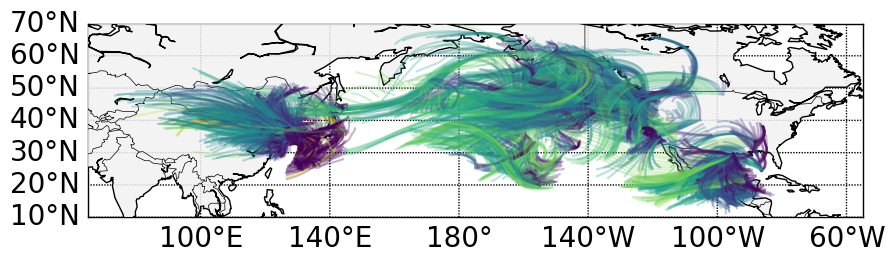

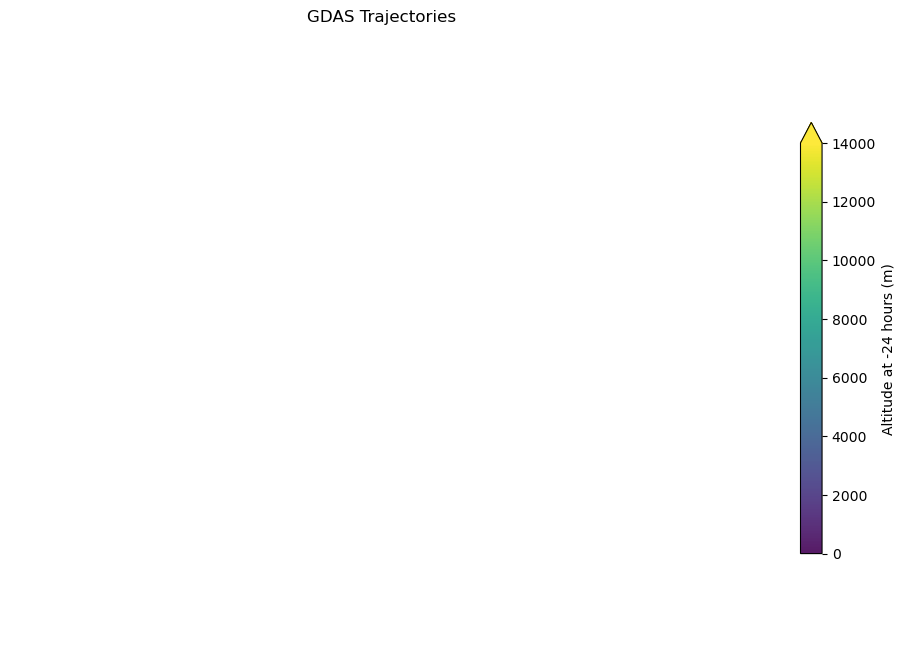

In [13]:
# # Symbolize by trajectory endpoint altitude
# def trajColorAlt(altitude):
#     # if(altitude > 17000): return 'red'
#     if(altitude > 16000): return 'red'
#     if(altitude > 15000): return 'red'
#     if(altitude > 14000): return 'red'
#     if(altitude > 13000): return 'red'
#     if(altitude > 12000): return 'red'
#     if(altitude > 11000): return 'red'
#     if(altitude > 10000): return 'orange'
#     if(altitude > 9000): return 'olive'
#     if(altitude > 8000): return 'green'
#     if(altitude > 6000): return 'cyan'
#     if(altitude > 4000): return 'blue'
#     if(altitude > 3000): return 'purple'
#     if(altitude > 2000): return 'pink'
#     if(altitude > 1000): return 'gray'
#     if(altitude > 0): return 'brown'
    
def symbByMonth(month):
    if(month == 1): return 'maroon'
    if(month == 2): return 'red'
    if(month == 3): return 'coral'
    if(month == 4): return 'orange'
    if(month == 5): return 'gold'
    if(month == 6): return 'yellow'
    if(month == 7): return 'olive'
    if(month == 8): return 'green'
    if(month == 9): return 'cyan'
    if(month == 10): return 'blue'
    if(month == 11): return 'indigo'
    if(month == 12): return 'purple'

# Define the trajColorAlt function with viridis colormap
def trajColorAlt(altitude, min_altitude=0, max_altitude=14000):
    # Normalize the altitude to a range of 0 to 1
    norm_altitude = (altitude - min_altitude) / (max_altitude - min_altitude)
    norm_altitude = max(0, min(1, norm_altitude))  # Clamp between 0 and 1
    
    # Get the Viridis colormap
    cmap = plt.cm.viridis
    
    # Map the normalized altitude to a color
    rgba_color = cmap(norm_altitude)
    
    # Convert RGBA to a hex color
    hex_color = mcolors.to_hex(rgba_color)
    
    return hex_color

# mapcorners = [-295, -90, 5, 90] #All Traj
# mapcorners = [-150, 15, -60, 58] #NAM
mapcorners = [-295, 10, -55, 70] #GDAS
# mapcorners = [-295, -90, -23, 65] #NCEP
# mapcorners = [-255, -90, 5, 90] #ERA5


standard_pm = None

bmap_params = pysplit.MapDesign(mapcorners, standard_pm, lon_labels=['bottom'])

bmap = bmap_params.make_basemap()

# # Remove parallels and meridians
# for line in bmap.ax.lines:
#     if line.get_label() == 'parallels' or line.get_label() == 'meridians':
#         line.remove()

# Longitude

# # Draw latitude and longitude grid lines
# bmap.drawparallels(range(-90, 91, 30), labels=[1,0,0,0], fontsize=10)  # Latitude lines
# bmap.drawmeridians(range(-180, 181, 45), labels=[0,0,0,1], fontsize=10)  

alpha = 0.3

for traj in trajgroup:
    # print(f"On traj: {traj}")
    altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
    traj.trajcolor = trajColorAlt(altitude0) #uncomment to symbolize by altitude
    bmap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20, alpha=alpha)
    
    # month0 = traj.data.DateTime[0].month
    # traj.trajcolor = symbByMonth(month0)

# Define altitude range for normalization
min_altitude = 0
max_altitude = 14000

# # Initialize a figure for plotting
# fig, ax = plt.subplots(figsize=(12,8))

# norm = plt.Normalize(vmin=min_altitude, vmax=max_altitude)
# sm = ScalarMappable(cmap=plt.cm.viridis, norm=norm)
# sm.set_array([])  # Required for ScalarMappable to work properly

# # Add the colorbar to the map
# cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7)
# cbar.set_label('Altitude (m)')
# ax.axis('off')
# plt.title("All Input Data Trajectories")
# # Show the plot
# plt.show()

# Initialize a figure for plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Create a normalization object with truncated limits
norm = Normalize(vmin=min_altitude, vmax=max_altitude)

# Create a colormap that includes an alpha channel (0.3 for 30% opacity)
cmap = plt.cm.viridis
cmap_with_alpha = cmap(np.arange(cmap.N))
cmap_with_alpha[:, -1] = 0.9  # Set the alpha channel to 0.3 for all colors
cmap_with_alpha = plt.cm.colors.ListedColormap(cmap_with_alpha)

# Create a ScalarMappable for the colorbar with the modified colormap
sm = ScalarMappable(cmap=cmap_with_alpha, norm=norm)
sm.set_array([])  # Required for ScalarMappable

# Add the colorbar with an extended arrow at the top
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, extend='max')
cbar.set_label('Altitude at -24 hours (m)')

# Turn off the plot axes
ax.axis('off')

# Add a title
plt.title("GDAS Trajectories")

# Show the plot
plt.show()